# Preprocess MIND Dataset

In [1]:
#import necessary libraries
## for uploadinf data
import pandas as pd
import os
import numpy as np


## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for Cleaning Text
import re
import nltk
from nltk import download
download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /home/mo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Load MIND news dataset
DATA_PATH='./dataset/'
newsDF=pd.read_pickle('./dataset/goodDataWithTrafilatura.p').reset_index().drop(columns='index')


In [29]:
#Show head of dataframe
newsDF.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Article
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,The royals are free to shop wherever they choo...
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,Ask any diet expert what they think about fibe...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,"ZOLOTE, Ukraine — Lt. Ivan Molchanets peeked o..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,"Walking into the Bradley Center, I could feel ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,[Video by Health.com]\nWhat are skin tags?\nAs...


Checking for Null values

In [30]:
# Checking for null values
newsDF.isnull().sum()

News ID         0
Category        0
SubCategory     0
Title           0
Abstract        0
URL             0
Article        17
dtype: int64

In [31]:
#Dropping Null Values
newsDF.dropna(inplace=True)
newsDF=newsDF.reset_index().drop(columns='index')

Display shape of dataframe

In [32]:
#display shape of dataframe
newsDF.shape

(48595, 7)

In [33]:
newsDF.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Article
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,The royals are free to shop wherever they choo...
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,Ask any diet expert what they think about fibe...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,"ZOLOTE, Ukraine — Lt. Ivan Molchanets peeked o..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,"Walking into the Bradley Center, I could feel ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,[Video by Health.com]\nWhat are skin tags?\nAs...


# Plotting Words Distribution

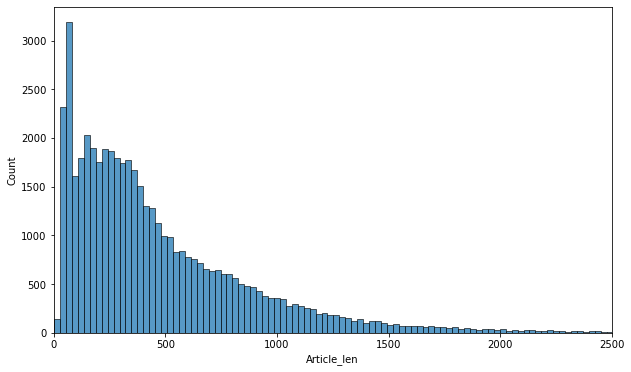

In [34]:
articles = newsDF['Article'].to_list()
# ArtDF = pd.DataFrame({'Article': articles})
newsDF['Article_len'] = newsDF['Article'].apply(lambda x: len(re.findall("\w+",x)))
plt.figure(figsize=(10,6))
plt.xlim([0,2500]) 
sns.histplot(data=newsDF, x='Article_len')
plt.show()

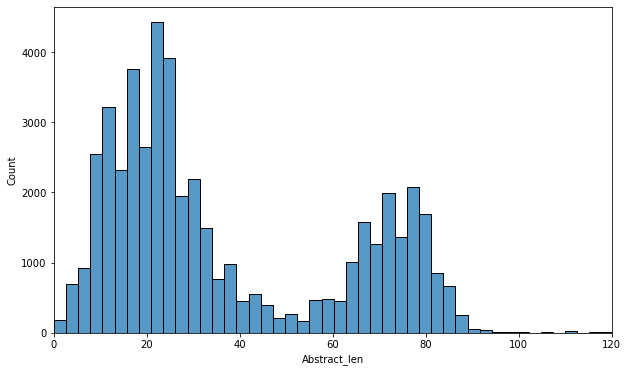

In [35]:
newsDF['Abstract_len'] = newsDF['Abstract'].apply(lambda x: len(re.findall("\w+",x)))
plt.figure(figsize=(10,6))
plt.xlim([0,120])
sns.histplot(data=newsDF, x='Abstract_len')
plt.show()

In [36]:
newsDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Article_len,48595.0,496.127318,503.426547,2.0,176.0,356.0,662.0,12353.0
Abstract_len,48595.0,37.425414,26.795018,0.0,17.0,26.0,65.0,487.0


# Cleaning Text

Removing unnecessary text. For Example:
- CURRENCIES
- EMAILS
- CONTRACTIONS

        Contraction: changing short word to long. For Example: “ain’t” = “is not”; “can’t” = “cannot”.

In [37]:
# Handeling the CURRENCIES and EMAILS

CURRENCIES = {
    "$": "USD", "zł": "PLN", "£": "GBP", "¥": "JPY", "฿": "THB", "₡": "CRC", "₦": "NGN","₩": "KRW",
    "₪": "ILS", "₫": "VND", "€": "EUR", "₱": "PHP", "₲": "PYG", "₴": "UAH", "₹": "INR",}
CURRENCY_REGEX = re.compile(
    "({})+".format("|".join(re.escape(c) for c in CURRENCIES.keys())))

EMAIL_REGEX = re.compile(
    r"(?:^|(?<=[^\w@.)]))([\w+-](\.(?!\.))?)*?[\w+-]@(?:\w-?)*?\w+(\.([a-z]{2,})){1,3}(?:$|(?=\b))",
    flags=re.IGNORECASE | re.UNICODE,)



In [38]:
# Handeling the Contractions

# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions_dict =          {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have", "i've": "i have"}
## got this function from https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

In [39]:
def clean_text(row, remove_stopwords = True):
    row=row.lower()  #make text in lower cases

    row=expand_contractions(row) #handeling the Contractions
    row = EMAIL_REGEX.sub(' ',str(row)) #remove any email
    row = CURRENCY_REGEX.sub(' ',str(row)) #currency handling
    row= re.sub("(@[A-Za-z0-9]+)",' ',str(row)) #remove any hashtages
    row= re.sub("(#[A-Za-z0-9]+)",' ',str(row)) #remove any mentions
    row=re.sub(r'http\S+', '', str(row)) #remove any url
    
    # separate with no blundry MachineLeaning -> Machine Learning 
    row =' '.join(re.findall('[A-Za-z]*[^A-Z]*',  str(row))) 
    row =' '.join(re.findall('[(A-Z)-a-z]*[^A-Z]*',  str(row)))
    row=" ".join(nltk.word_tokenize(row))
    row = re.sub(r'[.\s][[A-Za-z0-9]*\.(com|org|edu|gif|net)','', str(row)) # remove any wibsite link
    row = re.sub(r'(--)+', ' ', str(row)) #remove any (--)or more come togethe 
    row = re.sub(r'((P|p)([.])(M|m))|((A|a)([.])(M|m))', lambda x: x.group().replace(".", ""), str(row)) #P.M -> PM 
    row = re.sub(r'\s:\s',' ', str(row))
    # 3 cases to separate by (-) -> (word-digit)(word-word)(digit-word)
    row =re.sub(r'(\d*[-]\w*)|(\w*[-]\w*)|(\w*[-]\d*)', lambda x: x.group().replace("-", " "), str(row)) 
    row = re.sub(r'((\w+)([.])(\w+))', lambda x: x.group().replace(".", ""), str(row)) #take.note -> take note
    row =re.sub(r'([.])(\w+)', lambda x: x.group().replace(".", " . "),str(row)) # .first -> first
    row =re.sub(r'(\w+)([.])', lambda x: x.group().replace(".", " . "),str(row))
    
    row=nltk.sent_tokenize(row)
    row=" ".join([lem.lemmatize(word) for word in row if word not in stopwords.words('english')])
    row=re.sub(r"""[<>——_―()|&=\‘”"“``\'\♥️🇺🇸'+\"©ø/\[\]\\;?~*!]""", ' ', str(row)) 
    row=re.sub(r'(\s[’]\s)', lambda x: x.group().replace(" ’ ", "’"), str(row)) #the countery's Leader  -> c ' d
    row = re.sub(' +', ' ', str(row)) #remove multi spaces or tap

    #row=row[:row.find('sign up')
    #row=row[:row.find('download')]
    
#     if remove_stopwords: # remove stop words
#         text = row.split()
#         stops = set(stopwords.words("english"))
#         row = [w for w in text if not w in stops]
#         row = " ".join(row)
    return row


In [40]:
newsDF["Cleaned_Article"] =newsDF['Article'].apply(lambda x:clean_text(x)) 

In [41]:
newsDF["Cleaned_Article"][3]

'walking into the bradley center , i could feel the excitement . the fans , the bass heavy music blaring , the smell of popcorn and the bright lights of the jumbotron this was the symphony better known as an nba pregame . this was my first game as the fiancée of the milwaukee bucks franchise player , michael redd . my heart raced as i politely passed by the other , impeccably dressed ladies . when i looked down at myself , i saw the schoolteacher and preacher’s kid i was i looked professional but far from glamorous . every single detail of these women was perfectly in place , down to their shoes , which were equally as amazing as their handbags . i was completely out of my element , and my mind was filled with all of the negative things i ever thought about myself . i mean , who was i kidding michael could have anyone he wanted . did he really think i could fit in michael and i met or rather , met again in 2003 . our families were a part of the same church , and both of our fathers wer

In [42]:
newsDF["Cleaned_Abstract"] =newsDF['Abstract'].apply(lambda x:clean_text(x)) 

In [43]:
newsDF[['Cleaned_Article','Cleaned_Abstract']]

,Cleaned_Article,Cleaned_Abstract
0,the royals are free to shop wherever they choo...,"shop the notebooks , jackets , and more that t..."
1,ask any diet expert what they think about fibe...,these seemingly harmless habits are holding yo...
2,"zolote , ukraine lt . ivan molchanets peeked o...",lt . ivan molchanets peeked over a parapet of ...
3,"walking into the bradley center , i could feel...","i felt like i was a fraud , and being an nba w..."
4,video by what are skin tags as you get older ...,"they seem harmless , but there is a very good ..."
...,...,...
48590,realme keeps on increasing its share of the in...,over 400 percent more phones shipped year on year
48591,when the us . women s national soccer team arr...,when the us . women s national soccer team arr...
48592,"malibu , ca november 8 , 2019 , marked the one...",woolsey fire anniversary a community is foreve...
48593,"sometimes , what happens on the sidelines can ...","sometimes , what happens on the sidelines can ..."


Let’s Inspect Some clean data

In [46]:
for i in range (0,4):
    inspect=newsDF.Cleaned_Article[np.random.randint(0,43647)]
    print('Article:',i+1,"\n", inspect)
    print("-----------------------------------------------------------------------------------------------")

Article: 1 
 the prison counselor had finished her group session a few minutes earlier , and now it was time for indian creek correctional center inmate lonnie crowder to step up . the six dozen men of building 4 , side b , incarcerated in what state officials believe is the largest treatment oriented prison in the nation , lined up chairs as crowder set up an easel on one of the unit’s game tables , and wrote down success and achievement . there are 1,000 offenders at indian creek , all of whom are in the so called therapeutic community treatment program . most were sent there against their will when they had about two years left to serve . but many end up buying into into the prison’s highly structured , intensive program aimed at changing minds and changing behavior . crowder’s one of the ones who has bought in . prison officials named him an elder , a leadership and mentoring role prison officials gave him as he nears the end of two decades behind bars . it helped that antonio davi

In [48]:
for i in range (0,4):
    inspect=newsDF.Cleaned_Abstract[np.random.randint(0,43647)]
    print('Abstract:',i+1,"\n", inspect)
    print("-----------------------------------------------------------------------------------------------")

Abstract: 1 
 parenting double duty elin nordegren emerged for the first time since giving birth to her third child . the model , 39 , and boyfriend jordan cameron cheered on her 10 year old son , charlie , at a soccer tournament in florida on friday , october 18 . the couple brought along their newborn for the family outing . nordegren glowed in a black , floral print maxi dress and white sandals . she chatted with cameron , 31 , as he held their first child together . the proud mom took in the game from a chair on the sidelines . the sweden native shares daughter sam , 12 , and son charlie with ex husband tiger woods . the pair split in 2010 following his highly publicized cheating scandal . us weekly reported in june that nordegren was pregnant . she showed off her baby bump at charlie s flag football game at the time . a source told us in june that she and cameron were very happy about the pregnancy and preferred to stay out of the spotlight . elin maintains a low profile and has a

# Plotting Words Distribution After Cleaning

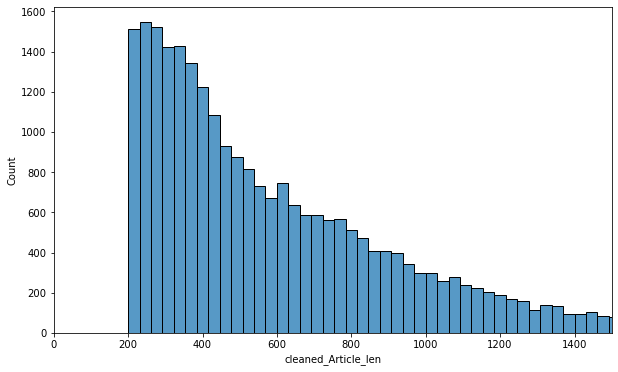

In [100]:
# cleanedArtDF = pd.DataFrame({'Cleaned_Article': cleaned_Article})

newsDF['cleaned_Article_len'] = newsDF['Cleaned_Article'].apply(lambda x: len(re.findall("\w+",x)))
plt.figure(figsize=(10,6))
plt.xlim([0,1500])
sns.histplot(data=newsDF, x='cleaned_Article_len')
plt.show()

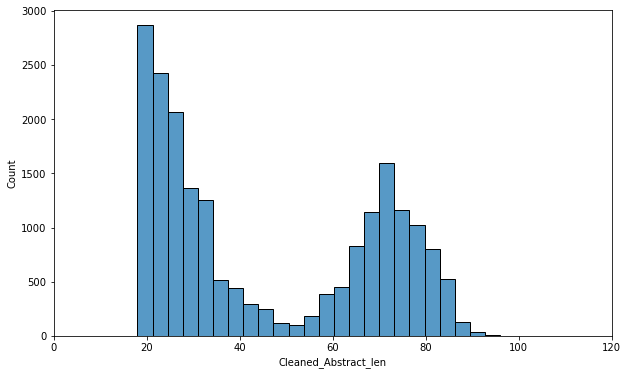

In [119]:
# cleanedArtDF = pd.DataFrame({'Cleaned_Article': cleaned_Article})

newsDF['Cleaned_Abstract_len'] = newsDF['Cleaned_Abstract'].apply(lambda x: len(re.findall("\w+",x)))
plt.figure(figsize=(10,6))
plt.xlim([0,120])
sns.histplot(data=newsDF, x='Cleaned_Abstract_len')
plt.show()

In [51]:
#Summary of the dataset
newsDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Article_len,48595.0,496.127318,503.426547,2.0,176.0,356.0,662.0,12353.0
Abstract_len,48595.0,37.425414,26.795018,0.0,17.0,26.0,65.0,487.0
cleaned_Article_len,48595.0,491.792119,501.015026,2.0,174.0,354.0,658.0,12269.0
Cleaned_Abstract_len,48595.0,37.243050,26.648373,0.0,17.0,26.0,65.0,486.0


    Here we see that our article maximum lenght is 157289 words

Let’s check how many Articles are under  131991 (max. length)

In [52]:
cleanedArtLen=newsDF['cleaned_Article_len'].to_list()
cleanedAbtLen=newsDF['Cleaned_Abstract_len'].to_list()


In [24]:
def wordsCountsBelow(maxLen,lst):
    count=0
    for length in lst:
        if length< maxLen:
            count+=1
    print(count/len(lst))       

In [25]:
wordsCountsBelow( 4000,cleanedArtLen)

0.9982714271015537


 99.8% of Article length Are under 4000 words 

In [26]:
wordsCountsBelow( 100,cleanedAbtLen)

0.9956785677538842


 99.5% of Abstract length Are under 100 words 

Let’s check how many Articles are under 1500 words

In [27]:
wordsCountsBelow(1500,cleanedArtLen)

0.9626916349418665


Let’s check how many Abstract are under 80 words

In [28]:
wordsCountsBelow(80,cleanedAbtLen)

0.939438213808005


In [29]:
def wordsCountsBetween(minLen,maxLen,lst):
    count=0
    for length in lst:
        if length> minLen and  length<maxLen:
            count+=1
    print(count/len(lst))

In [30]:
wordsCountsBetween(100,1500,cleanedArtLen)

0.8204959357958638


In [31]:
wordsCountsBetween(10,100,cleanedAbtLen)

0.9052988990636897


In [117]:
newsDF1=newsDF[(newsDF['Cleaned_Abstract_len'] >= 18) & (newsDF['Cleaned_Abstract_len'] <= 100 )]
newsDF1.shape

(19988, 13)

In [118]:
newsDF1=newsDF1[(newsDF1['cleaned_Article_len'] >= 290) & (newsDF1['cleaned_Article_len'] <= 1500 )]
newsDF1.shape

(19988, 13)

In [110]:
newsDF = newsDF1.drop_duplicates(subset='Cleaned_Article')
newsDF.shape

(19988, 13)

In [120]:
newsDF.to_pickle('./dataset/cleanedData.p')

# Splitting Data

In [35]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(newsDF1['Cleaned_Article'],newsDF1['Abstract'],test_size=0.1,random_state=0,shuffle=True)


# Tokenizing

Now we are going to tokenize our article sequence:

In [36]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))
max_text_len=8000
thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print(x_voc)

% of rare words in vocabulary: 59.496162787790915
Total Coverage of rare words: 0.784546129397034
64812
